In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

In [160]:
df = pd.read_csv("A2_data.csv")

In [139]:
# unique classes

print(df['class'].unique())

['GALAXY' 'QSO' 'STAR']


In [161]:
# find where the g is negative
print( df[df['g'] < 0] )
print( df[df['u'] < 0] )
print( df[df['z'] < 0] )

g_column = df['g']
u_column = df['u']
z_column = df['z']

# round up the values in the g column
g_column = g_column.round(0)
u_column = u_column.round(0)
z_column = z_column.round(0)


# mean_value_u = df[['u']].min()
# mean_value_g = df[['g']].min()
# mean_value_z = df[['z']].min()


mean_value_u = df.nsmallest(2, ['u', 'g','z'])
# mean_value_g
# mean_value_z

print(mean_value_u)
# print(mean_value_g)
# print(mean_value_z)


# # drop row 79543
# df= df.drop(79543, axis=0)




# df = df.replace([-9999.0], 'new value')

            alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       field_ID    MJD  redshift  plate class  
79543       537  58146     1.828   7834  STAR  
            alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       field_ID    MJD  redshift  plate class  
79543       537  58146     1.828   7834  STAR  
            alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       field_ID    MJD  redshift  plate class  
79543       537  58146     1.828   7834  STAR  
            alpha      delta           u           g         r         i  \
79543  224.006526  -0.624304 -9999.00000 -9999.00000  18.16560  18.01675   
57763  208.358688  33.825699    10.99623    13.66217  12.35763  12.63744   

                z  field_ID    MJD  

In [162]:
df['u'] = df['u'].replace([-9999.0], 10.99623 )
df['g'] = df['g'].replace([-9999.0], 13.66217 )
df['z'] = df['z'].replace([-9999.0], 1.30247 )

print( df[df['g'] < 0] )
print( df[df['u'] < 0] )
print( df[df['z'] < 0] )

Empty DataFrame
Columns: [alpha, delta, u, g, r, i, z, field_ID, MJD, redshift, plate, class]
Index: []
Empty DataFrame
Columns: [alpha, delta, u, g, r, i, z, field_ID, MJD, redshift, plate, class]
Index: []
Empty DataFrame
Columns: [alpha, delta, u, g, r, i, z, field_ID, MJD, redshift, plate, class]
Index: []


In [163]:
# transform classes to numbers
labels_numeric = df['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

labels = df['class']
# drop the class column
df = df.drop(['class','field_ID','plate','MJD'], axis=1)

In [164]:
df.head()

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000


PCA

In [165]:
# apply PCA

scaler = StandardScaler()

pca = PCA(n_components=2)
scaled = scaler.fit_transform(df)


# pca.fit(scaled)

transformed = pca.fit_transform(scaled)

In [166]:
transformed_pca = pd.DataFrame(transformed, columns=['PC1', 'PC2'])

key=transformed_pca.keys()
transformed_pca

,PC1,PC2
0,-0.902680,0.008752
1,-2.981034,0.054954
2,-1.368770,0.173260
3,-1.703611,0.328792
4,3.601477,1.073735
...,...,...
99995,-2.230045,-1.940777
99996,-1.063359,-1.221390
99997,1.556908,0.016903
99998,-0.799626,1.079676


Visualizing decision boundaries

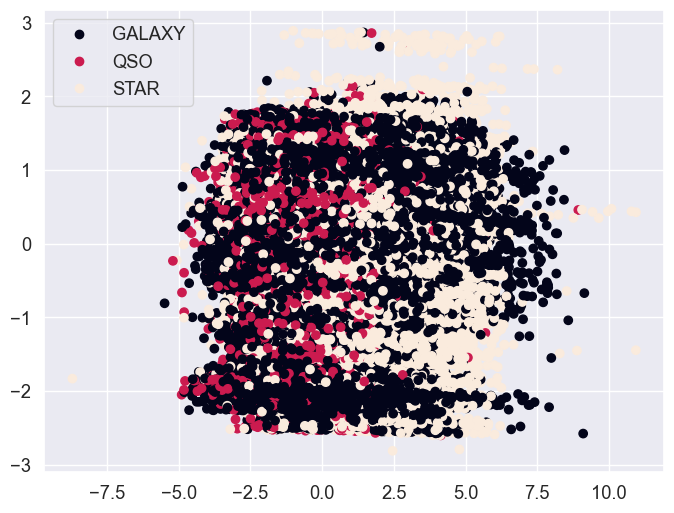

In [167]:
# plot the data

# plt.scatter(transformed_pca.iloc[:,0], transformed_pca.iloc[:,1]) #, c=labels)
# plt.show()

plt.figure(figsize=(8,6))
plot = plt.scatter(transformed_pca.iloc[:,0], transformed_pca.iloc[:,1], c=labels_numeric)
plt.legend(handles=plot.legend_elements()[0], labels=list(labels.unique()))

plt.show()

Random Forest Classifier

In [168]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(transformed_pca, labels, test_size=0.3, random_state=123, stratify=labels)
clf = RandomForestClassifier()

In [16]:
#scale the data to speed up Random Forest
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

Hyperparameter Optimisation

In [38]:
#Parameters of RandomForest
pprint(clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [17]:
#tuning using Random Search
hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}
rf_random = RandomizedSearchCV(clf, hyperparameters, n_iter = 50, cv = 5, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=15,
                                                    max_features='auto',
                                                    min_samples_leaf=2,
                                                    min_samples_split=10,
                                                    n_estimators=70),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 5, 10, 15, 20],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=123, verbose=2)

In [46]:
#before clean the data
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'entropy'}

In [18]:
#after clean the data
rf_random.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

Training the RandomForest

In [169]:
clf.set_params(criterion = 'entropy', max_features = 'auto', max_depth = 15, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 70)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=70)

Test and Evaluation

In [170]:
from sklearn.metrics import accuracy_score, f1_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

c:\Users\KYRIAKOS ARISTIDOU\anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [171]:
print('features importances are : ' , clf.feature_importances_)

features importances are :  [0.5970746 0.4029254]


<BarContainer object of 2 artists>

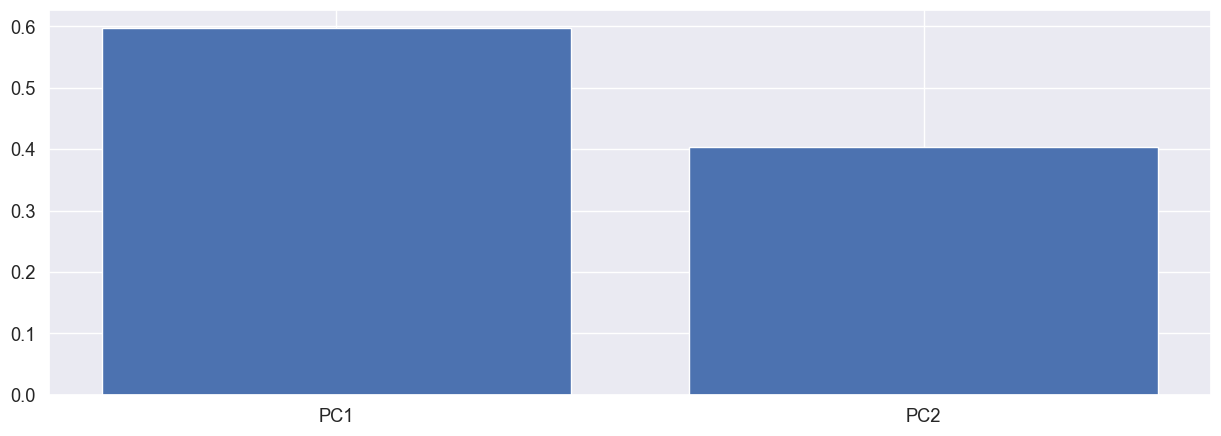

In [172]:
#Visualize feature importance

plt.figure(figsize=(15,5))
plt.bar(key,clf.feature_importances_)

In [173]:
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_


Classification report and confusion matrix

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.61      0.95      0.75     17834
         QSO       0.29      0.01      0.02      5688
        STAR       0.55      0.17      0.26      6478

    accuracy                           0.61     30000
   macro avg       0.48      0.38      0.34     30000
weighted avg       0.54      0.61      0.50     30000

[[17001   114   719]
 [ 5441    69   178]
 [ 5339    56  1083]]


Visualization of Confusion Matrix

Text(43.25, 0.5, 'True')

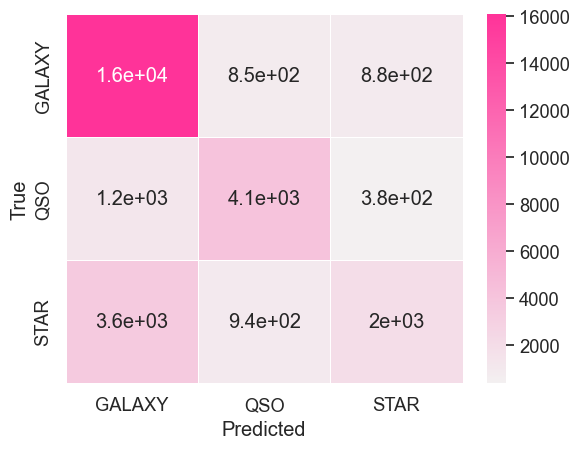

In [70]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')